In [8]:
"""Import libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
"""Read data"""
birddata = pd.read_csv('bird_tracking.csv')

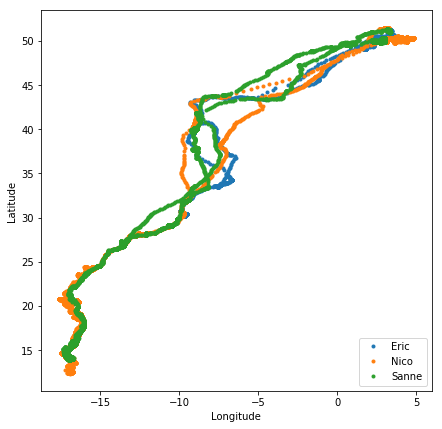

In [15]:
"""Simple data visualization"""

# Plot the trajectory for Eric
# ix = birddata.bird_name == "Eric"
# x, y = birddata.longitude[ix], birddata.latitude[ix]
# plt.figure(figsize=(7,7))
# plt.plot(x,y,".")
# plt.savefig("trajectory.pdf")


# Plot the trajectories for all three birds in a single plot
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

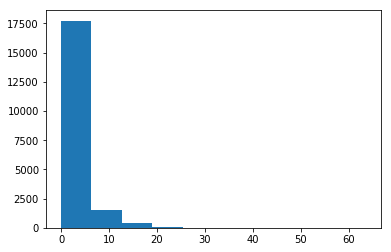

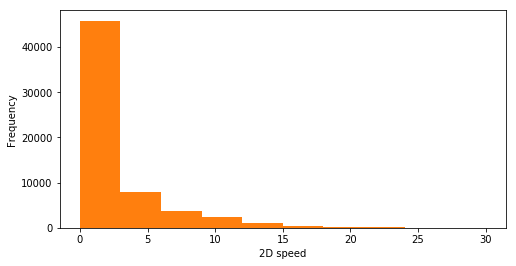

In [33]:
"""Examing Flight Speed"""

# Simple plot
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

# Details plot
plt.figure(figsize=(8,4))
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20), density=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("newhist.pdf")

# Make the histogram using pandas
birddata.speed_2d.plot(kind="hist", range=[0,30])
plt.xlabel("2D speed")
plt.savefig("pd_hist.pdf")

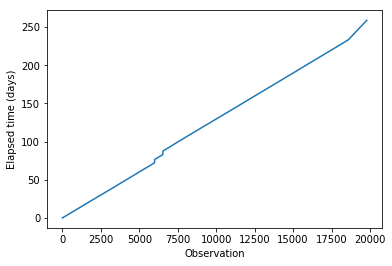

In [52]:
"""Using Datetime"""
import datetime

# Create timestamp column
timestamps = []
for k in range(len(birddata)):
    date_str = birddata.date_time.iloc[k]
    timestamps.append(datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S"))
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)

# Capture the amount of time that has elapsed since the beginning of data collection
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

# Plot elapsed time
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.pdf")

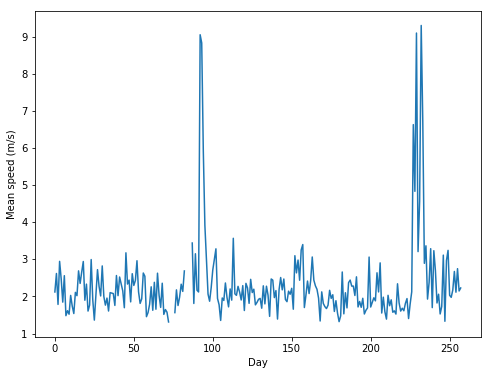

In [57]:
"""Calculating Daily Mean Speed"""
data = birddata[birddata.bird_name == "Eric"]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)
next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

# Plotting
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.savefig("dms.pdf")

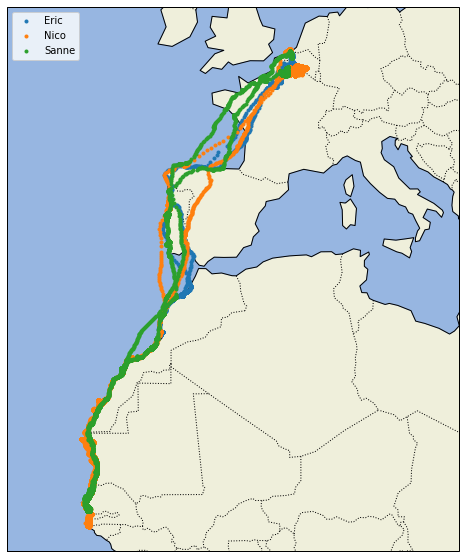

In [75]:
"""Using the Cartopy Library"""
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
for name in bird_names:
    ix = birddata.bird_name == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,".",transform=ccrs.Geodetic(),label=name)
plt.legend(loc="upper left")
plt.savefig("map.pdf")